In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
#Bring the data in 
loandata = pd.read_csv("CleanLoanData.csv")

/home/pizzle/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
list(loandata)

['Unnamed: 0',
 'index',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'GoodLoan']

In [6]:
loandata.describe()

,index,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,GoodLoan
count,887383.000000,8.873820e+05,887382.000000,887382.000000,887382.000000,887382.000000,887382.000000,8.873780e+05,887382.00000,887353.000000,...,887382.000000,887382.000000,887382.000000,887382.000000,887237.000000,887353.000000,8.171060e+05,8.171060e+05,8.171060e+05,887383.000000
mean,152155.671062,3.500184e+07,14755.280082,14741.893147,14702.480039,13.246747,436.717647,7.502761e+04,18.15702,0.314445,...,0.396690,45.919088,4.880741,2164.149236,0.014379,0.004991,2.257020e+02,1.394579e+05,3.206868e+04,0.924013
std,111089.623731,2.411336e+07,8435.456408,8429.898507,8442.107612,4.381884,244.186619,6.469823e+04,17.19060,0.862247,...,4.087818,409.693190,63.125175,4794.780087,0.134191,0.077625,1.031135e+04,1.537498e+05,3.749833e+04,0.264978
min,0.000000,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,59769.500000,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.710000,4.500000e+04,11.91000,0.000000,...,0.000000,0.000000,0.000000,280.170000,0.000000,0.000000,0.000000e+00,2.985300e+04,1.390000e+04,1.000000
50%,133718.000000,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.65000,0.000000,...,0.000000,0.000000,0.000000,462.790000,0.000000,0.000000,0.000000e+00,8.055850e+04,2.370000e+04,1.000000
75%,217438.500000,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.95000,0.000000,...,0.000000,0.000000,0.000000,831.250000,0.000000,0.000000,0.000000e+00,2.082050e+05,3.980000e+04,1.000000
max,421094.000000,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.00000,39.000000,...,358.680000,33520.270000,7002.190000,36475.590000,20.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


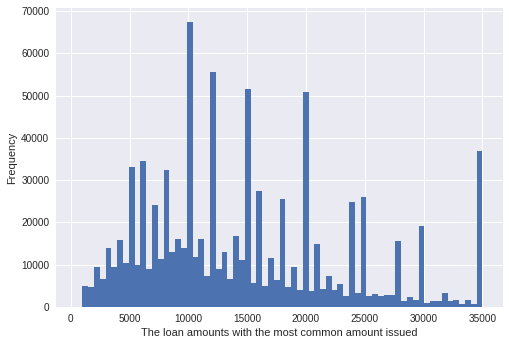

In [8]:
binns = [x*50 for x in range(0, 70)]
loandata.loan_amnt.plot(kind='hist', bins = 70)
plt.xlabel('The loan amounts with the most common amount issued')
plt.show()

In [9]:
badloan = loandata[loandata['GoodLoan']==False]
goodloan = loandata[loandata['GoodLoan']==True]
badloan.shape

(67430, 51)

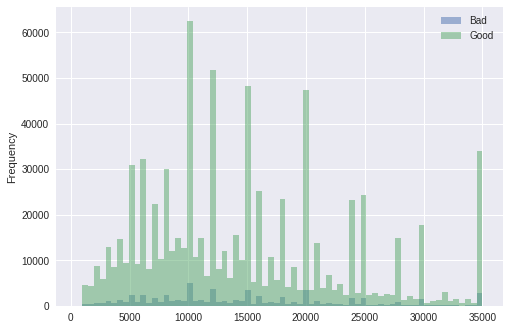

In [10]:
badloan.loan_amnt.plot(kind='hist', bins = 70, alpha = .5, label='Bad')
goodloan.loan_amnt.plot(kind='hist', bins = 70, alpha = .5, label='Good')
plt.legend(loc='upper right')
plt.show()

In [12]:
hist, edges = np.histogram(goodloan.loan_amnt, bins=70)
print(hist[3])


8762


In [13]:
stateCounts = []

In [15]:
#Is there a geographic correlation to the data? Zip Code and State? 
stateCounts = loandata.addr_state.value_counts()
goods_per_state= loandata[loandata['GoodLoan']==True].addr_state.value_counts()

perc_per_state = (stateCounts.loc[:]- goods_per_state.loc[:])/stateCounts.loc[:]
perc_per_state = perc_per_state.sort_values(ascending = True)
print(perc_per_state)
#perc_per_state
#perc_per_state
#plt.pie(perc_per_state)
#plt.hist(goods_per_state, label='Goods in Each State')
#plt.legend(loc='upper right')
#plt.show()

ME    0.001905
ND    0.008351
NE    0.020408
DC    0.048520
MS    0.052632
VT    0.054535
NH    0.057056
WY    0.057692
WV    0.060192
KS    0.061948
CO    0.063115
IL    0.063649
SC    0.063728
MT    0.065285
TX    0.066898
WI    0.067306
CT    0.068140
AK    0.068481
IN    0.069693
KY    0.070643
GA    0.070859
OR    0.071238
TN    0.071623
OH    0.072053
WA    0.072450
MA    0.073954
MN    0.074137
MI    0.074614
RI    0.075006
DE    0.075269
MO    0.076300
AR    0.076355
PA    0.076386
AZ    0.077454
SD    0.077686
NC    0.079733
MD    0.080025
NJ    0.080647
LA    0.080759
UT    0.080939
CA    0.081209
NM    0.081393
OK    0.082251
VA    0.082537
ID    0.083333
FL    0.084483
NY    0.084888
AL    0.088661
HI    0.093435
NV    0.094270
IA    0.214286
Name: addr_state, dtype: float64


Almost 20% of loans from people originating in Iowa are bad. North Dakota have a very low rate of bads. All other states are between 10% and 2%. 

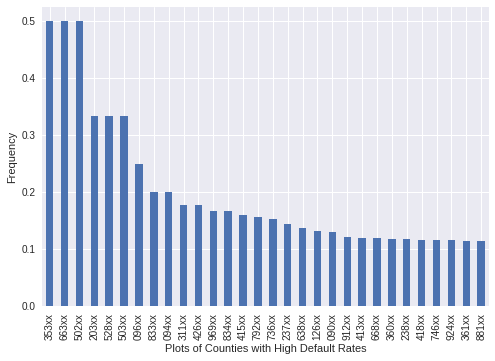

In [31]:
zipCounts = loandata.zip_code.value_counts()
goods_per_zip= loandata[loandata['GoodLoan']==True].zip_code.value_counts()

perc_per_state = (zipCounts.loc[:]- goods_per_zip.loc[:])/zipCounts.loc[:]
perc_per_state = perc_per_state.sort_values(ascending = False)
perc_per_st_plot = perc_per_state[0:30].plot(kind='bar')
plt.xlabel('Plots of Counties with High Default Rates')
plt.ylabel('Frequency')
plt.show()

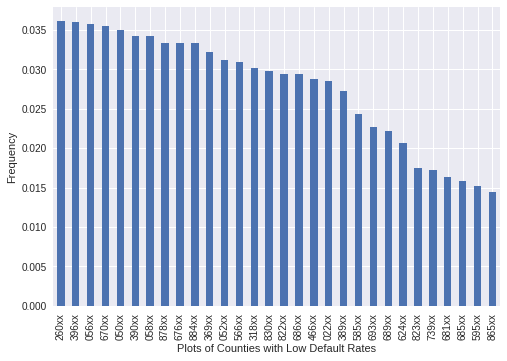

In [30]:
perc_per_state[-120:-90].plot.bar()
plt.xlabel('Plots of Counties with Low Default Rates')
plt.ylabel('Frequency')
plt.show()

There seems to be a few counties that have a high probability of bad loans for specific zip codes and nearly 90 counties have default rates of zero.  

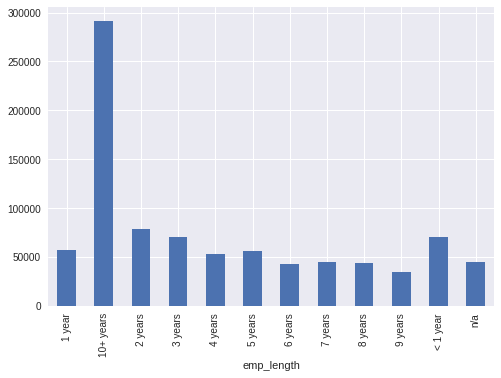

In [32]:
#Is there a relationship between employment length and the loan?

loans_group_empL = loandata.groupby('emp_length')
empL_counts = loans_group_empL.size()

my_plot = empL_counts.plot(kind='bar')

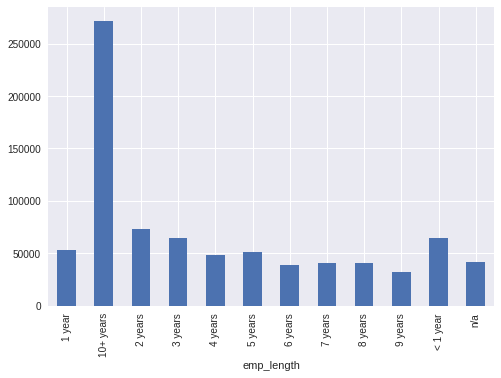

In [33]:
goodLoans = loandata[loandata['GoodLoan']==True]
gdLoans_gp_empL = goodLoans.groupby('emp_length')
gdLoans_grp = gdLoans_gp_empL.size()

my2_plot = gdLoans_grp.plot(kind='bar')

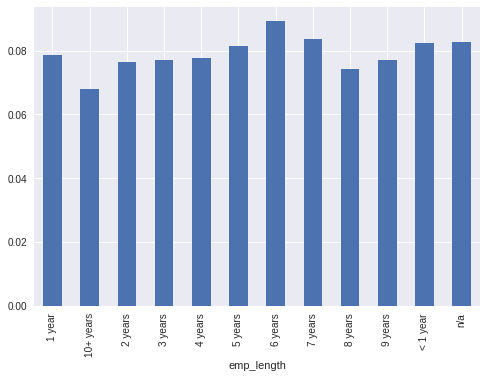

In [34]:
perc_emp_length = (empL_counts.loc[:] - gdLoans_grp.loc[:])/empL_counts.loc[:]
perc_emp_length.plot(kind='bar')

There is no significant difference in the employment length and predicting a bad loan. The mean percentage of bad loans for all employment lengths is 7%, and for all levels of employement it is within 1% of the mean. Although it is the lowest for those employed the longest, which makes sense. The highest default rate is 6 years of employment. 

In [35]:
#Is there a relationship between the amount of the loan and default?
bdLns = loandata[loandata['GoodLoan']==False]
bdLns.loan_amnt.describe()

count    67429.000000
mean     14858.564935
std       8471.158706
min        500.000000
25%       8325.000000
50%      13175.000000
75%      20000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

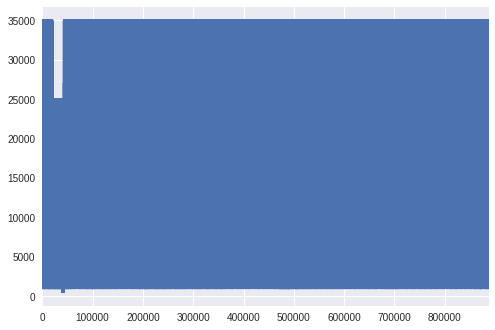

In [37]:
gdLns = loandata[loandata['GoodLoan']==True]
gdLns.loan_amnt.plot(kind='line')
plt.show()

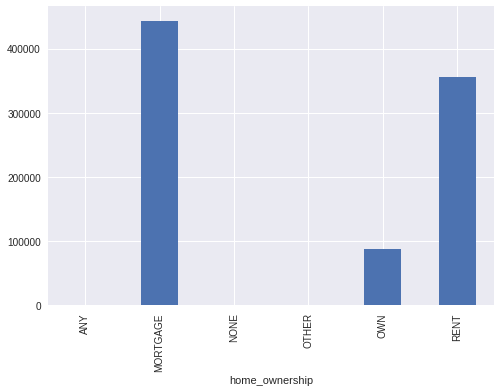

In [41]:
#How does home ownership indicate a loan status or value? 
loans_group_homeown = loandata.groupby('home_ownership')
homeown_counts = loans_group_homeown.size()

my_plot = homeown_counts.plot(kind='bar')

In [46]:
#How has lending club loans grown?

In [ ]:
loandata_OrdDate = loandata.groupby('issue_d')

In [133]:
loan_issued_permonth = loandata_OrdDate.loan_amnt.sum()

loan_issued_permonth.columns = ['issue_d', 'loan_amnt']
loan_issued_permonth = loan_issued_permonth.to_frame()
loan_issued_permonth.loan_amnt = loan_issued_permonth.loan_amnt.astype(float)
print(loan_issued_permonth.head())

           loan_amnt
issue_d             
Apr-2008   2433875.0
Apr-2009   3079475.0
Apr-2010   9510575.0
Apr-2011  17542075.0
Apr-2012  42051125.0


In [134]:

#loan_issued_permonth.columns = ['issue_d', 'loan_amnt']
loan_issued_permonth['issue_d'] = loan_issued_permonth.index
loan_issued_permonth.index = range(0, 103)
loan_i_pm = loan_issued_permonth
loan_issued_permonth.head()

,loan_amnt,issue_d
0,2433875.0,Apr-2008
1,3079475.0,Apr-2009
2,9510575.0,Apr-2010
3,17542075.0,Apr-2011
4,42051125.0,Apr-2012


In [136]:
loan_i_pm['issue_d'] = pd.to_datetime(loan_i_pm['issue_d'])

In [143]:
loan_i_pm.sort_values(by='issue_d', inplace=True)
loan_i_pm

In [147]:
total = 0
count = 0
loan_issued_permonth['sum'] = 0

for each in loan_i_pm['loan_amnt']: 
    total = each + total
    loan_i_pm['sum'].iloc[count] = total
    count+=1


/home/pizzle/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [149]:
loan_i_pm.head(10)

,loan_amnt,issue_d,sum
51,91850.0,2007-06-01,91850.0
42,348325.0,2007-07-01,440175.0
8,515300.0,2007-08-01,955475.0
94,372950.0,2007-09-01,1328425.0
85,753225.0,2007-10-01,2081650.0
76,1008650.0,2007-11-01,3090300.0
17,1887175.0,2007-12-01,4977475.0
34,2926000.0,2008-01-01,7903475.0
26,2959225.0,2008-02-01,10862700.0
60,4150050.0,2008-03-01,15012750.0


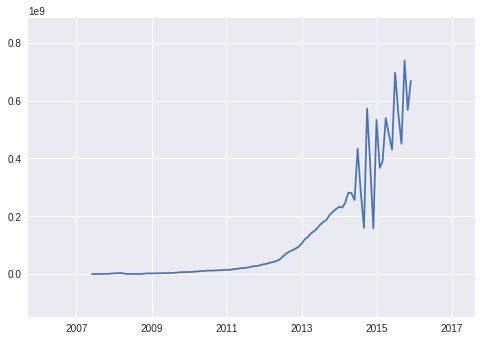

In [159]:
plt.plot(loan_i_pm['issue_d'], loan_i_pm['loan_amnt'])
plt.xticks()
plt.margins(.2)
plt.show()

In [68]:
loandata.int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
issue_d,,,,,,,,
Apr-2008,259.0,12.381004,2.645682,7.37,10.3900,11.970,14.1800,18.61
Apr-2009,333.0,12.591562,2.859358,6.00,9.6300,12.840,14.7400,20.11
Apr-2010,912.0,11.821765,2.848778,6.39,10.2500,11.360,13.8500,20.53
Apr-2011,1563.0,11.721011,3.691826,5.42,9.6300,11.110,14.9100,21.59
Apr-2012,3230.0,12.808118,4.257554,6.00,8.9000,13.110,15.3100,24.76
Apr-2013,9419.0,14.611187,4.246649,6.00,11.1400,14.330,17.7700,24.89
Apr-2014,19071.0,14.397006,4.254101,6.00,11.9900,14.160,17.5700,26.06
Apr-2015,35427.0,12.790760,4.389415,5.93,9.1700,12.690,15.6100,26.06
Aug-2007,74.0,11.543514,3.116487,7.43,8.7000,11.065,13.9900,17.86


In [74]:
loandata[['annual_inc', 'int_rate']].head()

,annual_inc,int_rate
0,24000.0,10.65
1,30000.0,15.27
2,12252.0,15.96
3,49200.0,13.49
4,80000.0,12.69
1752,55000.0,14.27
1760,34000.0,14.27
1798,89000.0,6.03
1804,100000.0,15.96
1810,70000.0,6.03


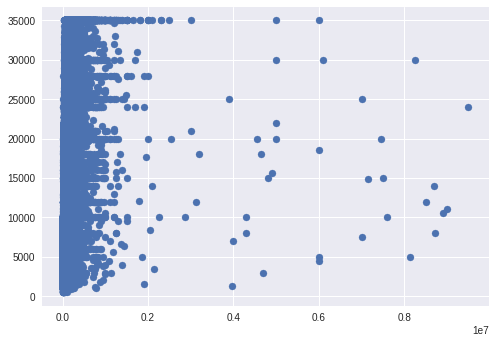

In [69]:
plt.scatter(loandata.annual_inc, loandata.loan_amnt)
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income')
plt.show()

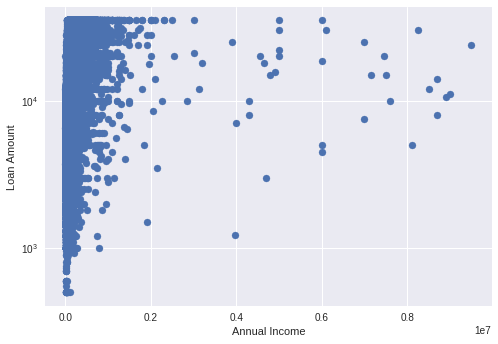

In [85]:
plt.scatter(loandata.annual_inc, loandata.loan_amnt)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.yscale('log')
plt.show()

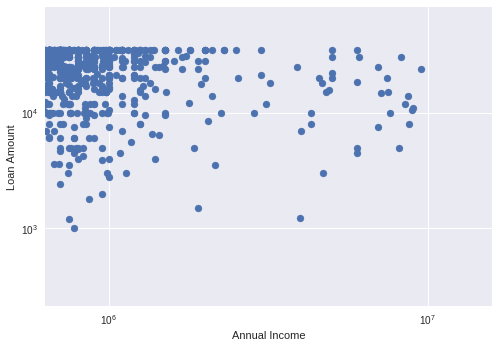

In [161]:
plt.scatter(loandata.annual_inc, loandata.loan_amnt)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.xscale('log')
plt.yscale('log')
plt.margins(.2)
plt.show()

__INSIGHTS:__

There are some features that can indicate the performance of a loan, but no one feature easily predicts loan quality. 

Certain states and zip codes have a high number of bad loans relative to the number of loans that originate from there. 


__Correlations:__

Similar to the "insights" it seems like bad and good loans correllate with certain states and certain zip codes. 

__Another hypothesis to test:__
I don't have any other hypotheses to test. I think this data has so many features, it will take several to determine the probability a loan will default. 

__Additional Questions:__
I wonder how several of these features relate to each other. 

In terms of a narrative, there a many data points that lending club gathers about lendees. There are many complex relationships with these points, which when visualized show a simple correlation; however, nothing absolutely infallible at predicting loan quality. I believe when I use a machine learning algorithm, I will be able to find several of these relationships more clearly and exploit them to predict the quality of a loan for someone who is investing in peer to peer lending through lending club. As an investor in lending club, this is very valuable to me. 